<a href="https://colab.research.google.com/github/skilove13/NLP-Specialization-Cousera/blob/main/C1_W1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1: Logistic Regression**

Welcome to week one of this specialization. You will learn about logistic regression. Concretely, you will be implementing logistic regression for sentiment analysis on tweets. Given a tweet, you will decide if it has a positive sentiment or a negative one. Specifically you will:

Learn how to extract features for logistic regression given some text
Implement logistic regression from scratch
Apply logistic regression on a natural language processing task
Test using your logistic regression
Perform error analysis
We will be using a data set of tweets. Hopefully you will get more than 99% accuracy.
Run the cell below to load in the packages.


**Import functions and data**

In [3]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # visualization library
import numpy as np                         # library for scientific computing and matrix operations
import re 
import string 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from os import getcwd
import pandas as pd                 # Library for Dataframes

**Imported functions**

Download the data needed for this assignment. Check out the documentation for the twitter_samples dataset.

twitter_samples: if you're running this notebook on your local computer, you will need to download it using:

nltk.download('twitter_samples')
stopwords: if you're running this notebook on your local computer, you will need to download it using:

nltk.download('stopwords')
Import some helper functions that we provided in the utils.py file:
process_tweet(): cleans the text, tokenizes it into separate words, removes stopwords, and converts words to stems.
build_freqs(): this counts how often a word in the 'corpus' (the entire set of tweets) was associated with a positive label '1' or a negative label '0', then builds the freqs dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.

In [5]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')
nltk.download('twitter_samples')

!pip install utils
import numpy as np

def process_tweet(tweet):
  stemmer = PorterStemmer()
  stopwords_english = stopwords.words('english')
  tweet = re.sub(r'\$\w*', '', tweet)
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  tweet = re.sub(r'#', '', tweet)
  tokenizer = TweetTokenizer(preserve_case=False,        strip_handles=True,reduce_len=True)
  tweet_tokens = tokenizer.tokenize(tweet)
  
  tweets_clean = []
  for word in tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation): 
      stem_word = stemmer.stem(word)  # stemming word
      tweets_clean.append(stem_word)
  return tweets_clean

def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


**Prepare the data**

The twitter_samples contains subsets of 5,000 positive tweets, 5,000 negative tweets, and the full set of 10,000 tweets.
If you used all three datasets, we would introduce duplicates of the positive tweets and negative tweets.
You will select just the five thousand positive tweets and five thousand negative tweets.

In [6]:
nltk.download('twitter_samples')

# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


Train test split: 20% will be in the test set, and 80% in the training set.

In [8]:
# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = train_pos + test_neg

#print(train_x)
print(len(train_x))

8000


Create the numpy array of positive labels and negative labels.

In [13]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos),1)), np.zeros((len(train_neg),1)), axis=0)
test_y = np.append(np.ones((len(test_pos),1)), np.zeros((len(test_neg),1)), axis=0)

print(train_y)
print(len(train_y))
print(test_y)
print(len(test_y))

# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
8000
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
2000
train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


Create the frequency dictionary using the imported build_freqs() function.

We highly recommend that you open utils.py and read the build_freqs() function to understand what it is doing.
To view the file directory, go to the menu and click File->Open.

for y,tweet in zip(ys, tweets):

        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

Notice how the outer for loop goes through each tweet, and the inner for loop steps through each word in a tweet.
The freqs dictionary is the frequency dictionary that's being built.
The key is the tuple (word, label), such as ("happy",1) or ("happy",0). The value stored for each key is the count of how many times the word "happy" was associated with a positive label, or how many times "happy" was associated with a negative label.

In [16]:
# create frequency dictionary

freqs = build_freqs(train_x , train_y)

#check the output 
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11346


**Process tweet**

The given function process_tweet() tokenizes the tweet into individual words, removes stop words and applies stemming.

In [17]:
print('This is an example of a positive tweet :\n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

This is an example of a positive tweet :
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


**Part 1: Logistic regression**

**Part 1.1: Sigmoid**

You will learn to use logistic regression for text classification.

The sigmoid function is defined as:

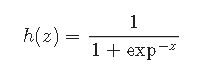
 
 
It maps the input 'z' to a value that ranges between 0 and 1, and so it can be treated as a probability.

alternate text Figure 1
**Instructions: Implement the sigmoid function**
You will want this function to work if z is a scalar as well as if it is an array.

**Hints**

numpy.exp

In [18]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # calculate the sigmoid of z
    h = 1 / (1 +np.exp(-z))
    ### END CODE HERE ###
    
    return h

In [19]:
# Testing your function 
if (sigmoid(0) == 0.5):
  print('SUCCESS!')
else:
  print('Failed!')

if (sigmoid(4.92) == 0.9927537604041685):
  print('CORRECT!')
else:
  print("Oops again!")

SUCCESS!
CORRECT!


**Logistic regression: regression and a sigmoid**

Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

Regression:

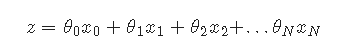

Note that the  values are "weights". If you took the Deep Learning Specialization, we referred to the weights with the w vector. In this course, we're using a different variable  to refer to the weights.

**Logistic regression**

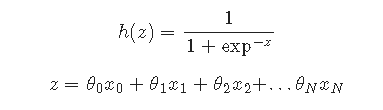

We will refer to 'z' as the 'logits'.

**Part 1.2 Cost function and Gradient**

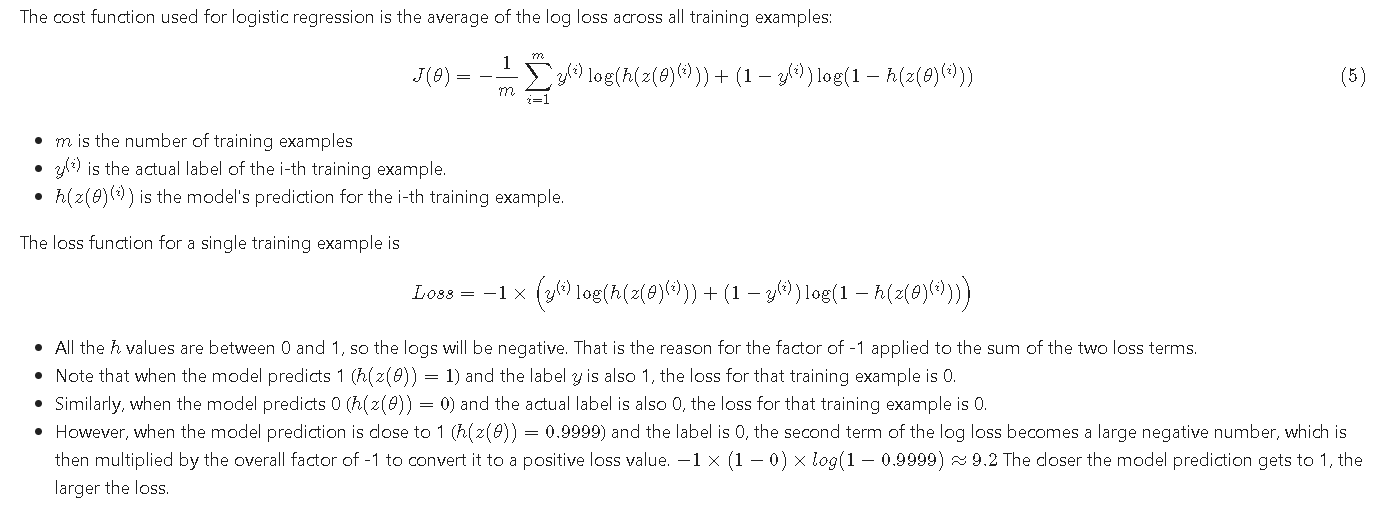


Update the weights

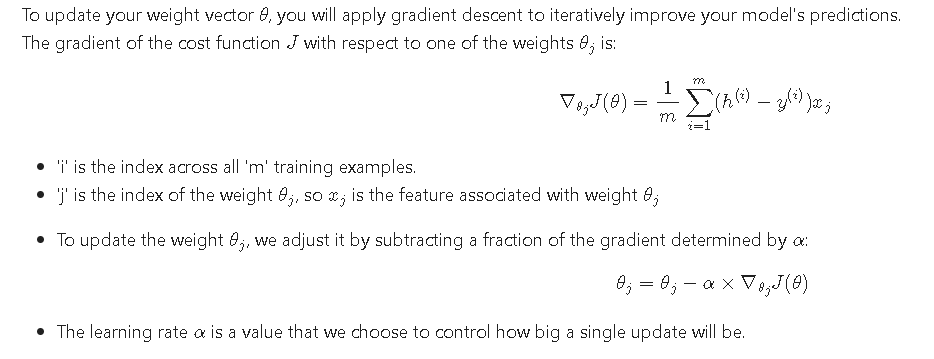

**Instructions: Implement gradient descent function**

The number of iterations num_iters is the number of times that you'll use the entire training set.
For each iteration, you'll calculate the cost function using all training examples (there are m training examples), and for all features.
Instead of updating a single weight 
 at a time, we can update all the weights in the column vector:
 
 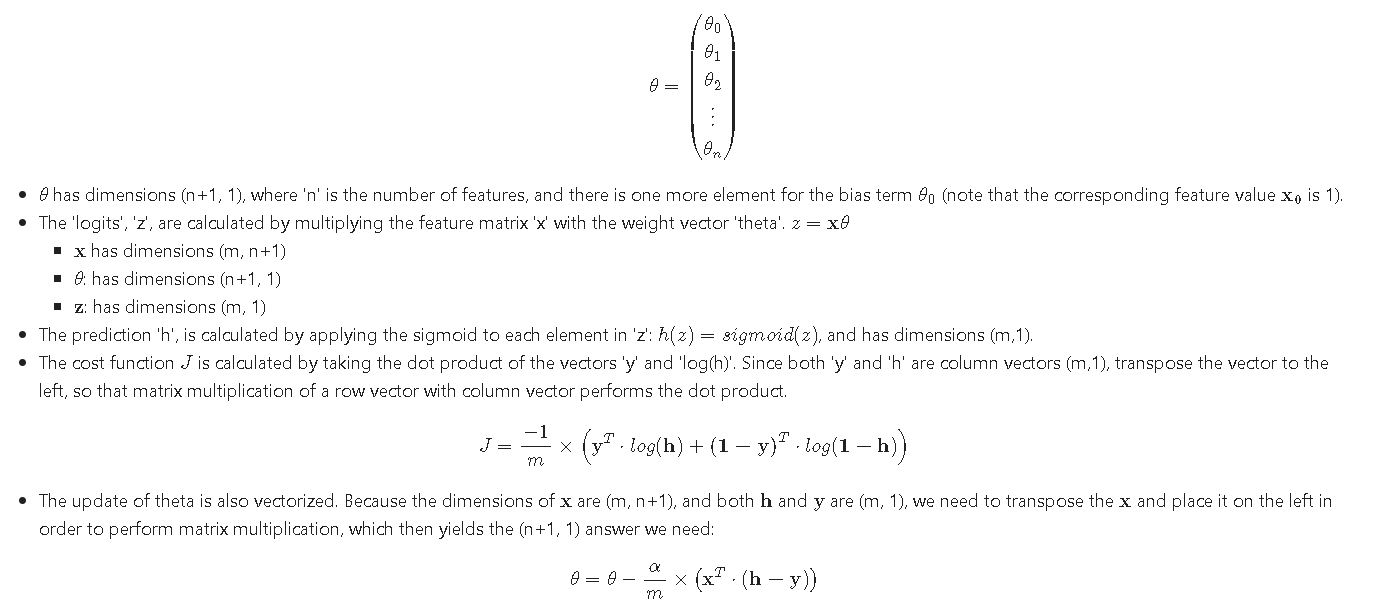

**Hints**

use np.dot for matrix multiplication.
To ensure that the fraction -1/m is a decimal value, cast either the numerator or denominator (or both), like `float(1)`, or write `1.` for the float version of 1.

In [26]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # get 'm', the number of rows in matrix x
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x ,theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = -1./m *(np.dot(y.transpose(),np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))
        #J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))    

        # update the weights theta
        theta = theta - (alpha/m) * np.dot(x.transpose(),(h-y))
        
    ### END CODE HERE ###
    J = float(J)
    return J, theta
# Check the function

In [32]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions

np.random.seed(1)

#X input is 10*3 with ones for the bias terms 
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
print('X is = \n' , tmp_X)

# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)
print('Y is = \n' , tmp_Y)

z = np.zeros((3, 1))
print('np.zeros is = \n', z)
print((z.shape))

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

X is = 
 [[1.00000000e+00 8.34044009e+02 1.44064899e+03]
 [1.00000000e+00 2.28749635e-01 6.04665145e+02]
 [1.00000000e+00 2.93511782e+02 1.84677190e+02]
 [1.00000000e+00 3.72520423e+02 6.91121454e+02]
 [1.00000000e+00 7.93534948e+02 1.07763347e+03]
 [1.00000000e+00 8.38389029e+02 1.37043900e+03]
 [1.00000000e+00 4.08904499e+02 1.75623487e+03]
 [1.00000000e+00 5.47751864e+01 1.34093502e+03]
 [1.00000000e+00 8.34609605e+02 1.11737966e+03]
 [1.00000000e+00 2.80773877e+02 3.96202978e+02]]
Y is = 
 [[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]]
np.zeros is = 
 [[0.]
 [0.]
 [0.]]
(3, 1)
The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


**Part 2: Extracting the features**

Given a list of tweets, extract the features and store them in a matrix. You will extract two features.
The first feature is the number of positive words in a tweet.
The second feature is the number of negative words in a tweet.
Then train your logistic regression classifier on these features.
Test the classifier on a validation set.

**Instructions: Implement the extract_features function.**

This function takes in a single tweet.
Process the tweet using the imported process_tweet() function and save the list of tweet words.
Loop through each word in the list of processed words
For each word, check the freqs dictionary for the count when that word has a positive '1' label. (Check for the key (word, 1.0)
Do the same for the count for when the word is associated with the negative label '0'. (Check for the key (word, 0.0).)

**Hints**
Make sure you handle cases when the (word, label) key is not found in the dictionary.
Search the web for hints about using the `.get()` method of a Python dictionary. Here is an example

In [33]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [34]:
# Check your function

# test 1
# test on training data
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.00e+00 3.02e+03 6.10e+01]]


In [35]:
# test 2:
# check for when the words are not in the freqs dictionary
tmp2 = extract_features('blorb bleeeeb bloooob', freqs)
print(tmp2)

[[1. 0. 0.]]


**Part 3: Training Your Model**

To train the model:

Stack the features for all training examples into a matrix X.
Call gradientDescent, which you've implemented above.
This section is given to you. Please read it for understanding and run the cell.

In [36]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.24216529.
The resulting vector of weights is [7e-08, 0.0005239, -0.00055517]


**Part 4: Test your logistic regression**

It is time for you to test your logistic regression function on some new input that your model has not seen before.

Instructions: Write predict_tweet
Predict whether a tweet is positive or negative.

Given a tweet, process it, then extract the features.
Apply the model's learned weights on the features to get the logits.
Apply the sigmoid to the logits to get the prediction (a value between 0 and 1).

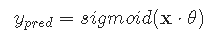

In [37]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
    
    ### END CODE HERE ###
    
    return y_pred

In [40]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

#print(freqs)
#print(theta)

I am happy -> 0.518580
I am bad -> 0.494339
this movie should have been great. -> 0.515331
great -> 0.515464
great great -> 0.530898
great great great -> 0.546273
great great great great -> 0.561561


In [42]:
my_tweet = 'I am learning :)'
predict_tweet(my_tweet , freqs , theta)

array([[0.81636424]])

**Check performance using the test set**

After training your model using the training set above, check how your model might perform on real, unseen data, by testing it against the test set.

Instructions: Implement test_logistic_regression
Given the test data and the weights of your trained model, calculate the accuracy of your logistic regression model.
Use your predict_tweet() function to make predictions on each tweet in the test set.
If the prediction is > 0.5, set the model's classification y_hat to 1, otherwise set the model's classification y_hat to 0.
A prediction is accurate when y_hat equals test_y. Sum up all the instances when they are equal and divide by m.
Hints
Use np.asarray() to convert a list to a numpy array
Use np.squeeze() to make an (m,1) dimensional array into an (m,) array

In [49]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def test_logistic_regression(test_x, test_y, freqs, theta):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)
    ### END CODE HERE ###
    
    return accuracy

In [ ]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

**Part 5: Error Analysis**

In this part you will see some tweets that your model misclassified. Why do you think the misclassifications happened? Specifically what kind of tweets does your model misclassify?

In [51]:
# Some error analysis done for you
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('THE PROCESSED TWEET IS:', process_tweet(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))

Label Predicted Tweet
THE TWEET IS: Funny how that happened when Phil was here too : )
THE PROCESSED TWEET IS: ['funni', 'happen', 'phil']
1	0.49727505	b'funni happen phil'
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/cHl12JvuxN http://t.co/GGgU9PYEjI
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48370665	b"i'm play brain dot braindot"
THE TWEET IS: Please go check out my awesome friend's stream at http://t.co/uVBD0iDwDW ! He's a fantastic artist. :)
THE PROCESSED TWEET IS: ['pleas', 'go', 'check', 'awesom', "friend'", 'stream']
1	0.47306934	b"pleas go check awesom friend' stream"
THE TWEET IS: @messiholic_ Lol 😄😄really?  I can't believe a beautiful girl like you are single :p
THE PROCESSED TWEET IS: ['lol', '😄', '😄', 'realli', "can't", 'believ', 'beauti', 'girl', 'like', 'singl', ':p']
1	0.49931837	b"lol   realli can't believ beauti girl like singl :p"
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/MifDDs7CQS http://t.co/Wt

Later in this specialization, we will see how we can use deep learning to improve the prediction performance.

**Part 6: Predict with your own tweet**


In [52]:
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.48139087]]
Negative sentiment
